In [72]:
import math
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm

In [33]:
def Fibonacci(n):
    if (n == 0 or n == 1 or n == 2):
        return math.ceil(n/2)
    else: 
        return Fibonacci(n-1) + Fibonacci(n-2)

In [104]:
def Fibonacci_lru_cache(n, cache):
    if (n == 0 or n == 1 or n == 2):
        return math.ceil(n/2)
    elif (not n in cache):
        cache[n] = Fibonacci_lru_cache(n-1, cache) + Fibonacci_lru_cache(n-2, cache)
    return cache[n]

In [51]:
cache = {0:0, 1:1, 2:1}
result1 = []
result2 = []
for i in range(30):
    result1.append(Fibonacci(i+1))
    result2.append(Fibonacci_lru_cache(i+1, cache))
print(f"The result of Fibonacci (n <= 30): {result1}")
print(f"The result of modified Fibonacci (n <= 30): {result2}")

The result of Fibonacci (n <= 30): [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040]
The result of modified Fibonacci (n <= 30): [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040]


In [91]:
def time_tester(n, f, *cache):
    start = time.time()
    if len(cache) == 0: 
        f(n)
    else:
        f(n, cache[0])
    return time.time() - start

In [99]:
time1 = []
for i in tqdm(range(43)):
    time1.append(time_tester(i+1, Fibonacci))

100%|██████████| 43/43 [12:11<00:00, 17.00s/it] 


In [112]:
cache = {0:0, 1:1, 2:1}
time2 = []
for j in tqdm(range(100)):
    time2.append(time_tester(j+1, Fibonacci_lru_cache, cache))

100%|██████████| 100/100 [00:00<00:00, 49426.16it/s]


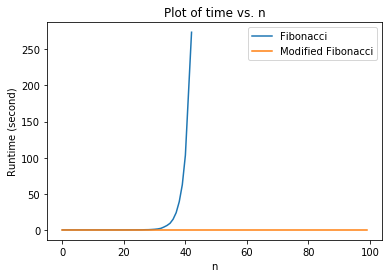

In [129]:
plt.plot(range(43), time1, label="Fibonacci")
plt.plot(range(100), time2, label="Modified Fibonacci")
plt.legend()
plt.xlabel("n")
plt.ylabel("Runtime (second)")
plt.title("Plot of time vs. n")
plt.savefig("README_img/EX3_1.png")
plt.show()

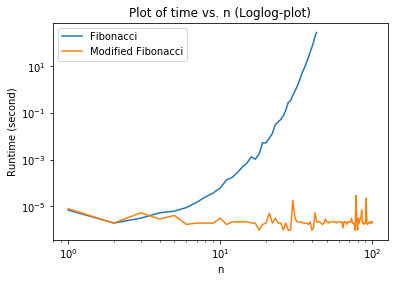

In [130]:
plt.loglog(range(1, 44), time1, label="Fibonacci")
plt.loglog(range(1, 101), time2, label="Modified Fibonacci")
plt.legend()
plt.xlabel("n")
plt.ylabel("Runtime (second)")
plt.title("Plot of time vs. n (Loglog-plot)")
plt.savefig("README_img/EX3_2.png")
plt.show()